## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

## Read the Dataset

In [2]:
df=pd.read_csv("Data/autos.csv",header=0, sep=',',encoding='Latin1')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Visualising the Data using EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Uni-Variate Analysis


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

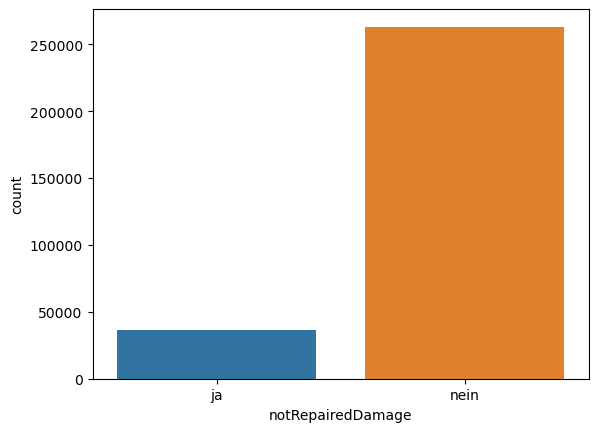

In [5]:
f = plt.figsize=(8,8)
sns.countplot(df.notRepairedDamage)

<AxesSubplot:xlabel='kilometer', ylabel='count'>

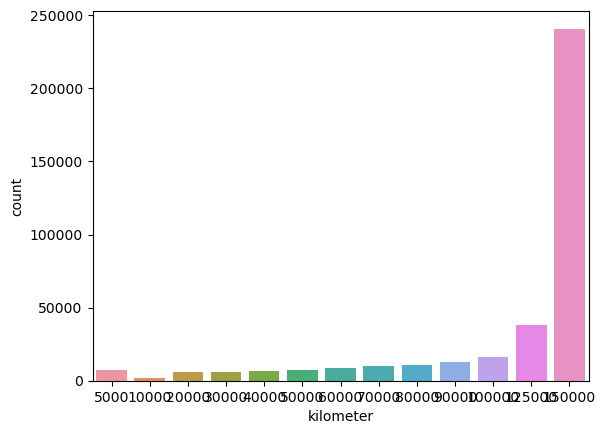

In [6]:
f = plt.figsize=(8,5)
sns.countplot(df.kilometer)

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

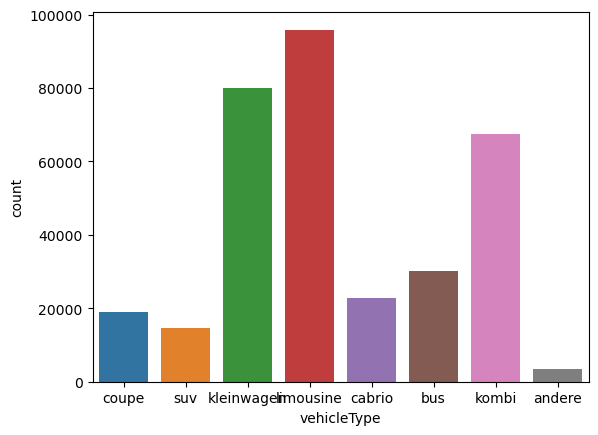

In [7]:
f = plt.figsize=(18,8)
sns.countplot(x='vehicleType',data=df)


<AxesSubplot:xlabel='fuelType', ylabel='count'>

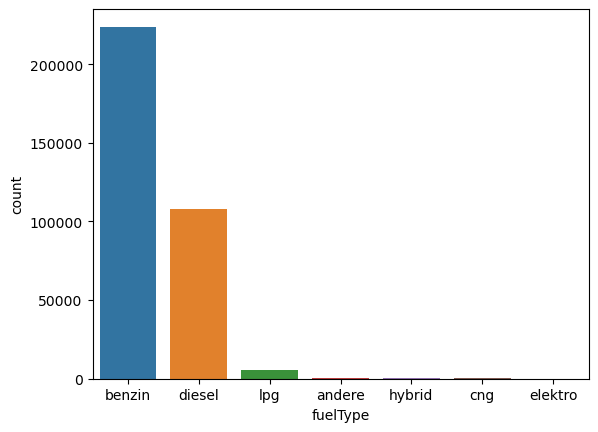

In [8]:
f = plt.figsize=(8,5)
sns.countplot(x='fuelType',data=df)


<AxesSubplot:xlabel='brand', ylabel='count'>

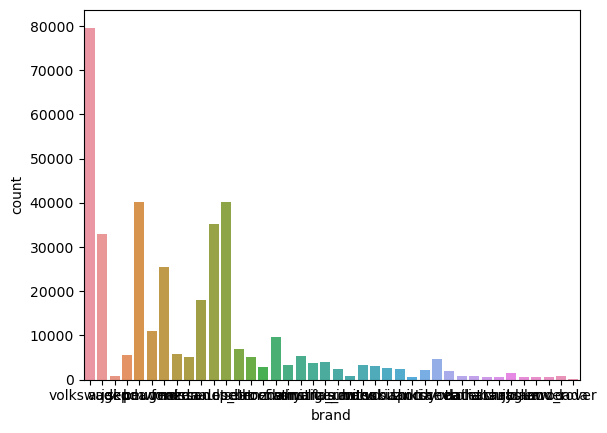

In [9]:
f = plt.figsize=(5,15)
sns.countplot(x='brand',data=df)

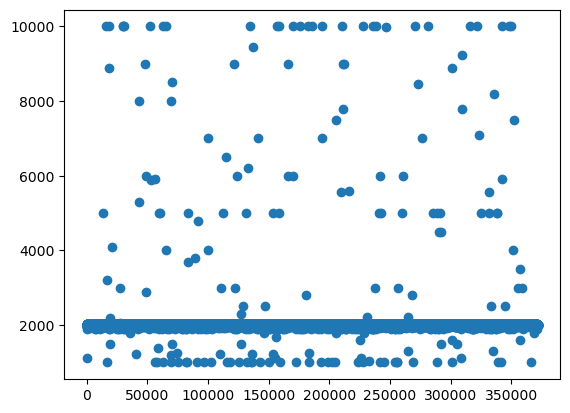

In [10]:
plt.scatter(df.index,df['yearOfRegistration'])
plt.show()

(array([62236., 22403., 36170., 30918., 30631., 62125., 23765., 25074.,
        27337., 50869.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

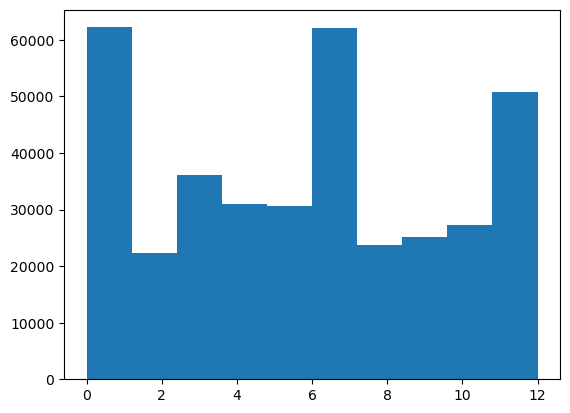

In [11]:
plt.hist(df['monthOfRegistration'])


<AxesSubplot:ylabel='Density'>

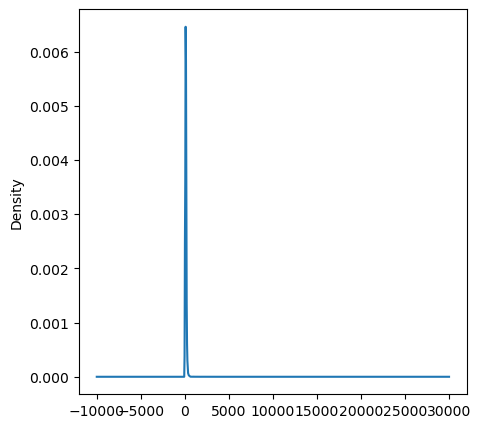

In [12]:
plt.figure(figsize=(5,5))
df['powerPS'].plot(kind='density')

<AxesSubplot:xlabel='price'>

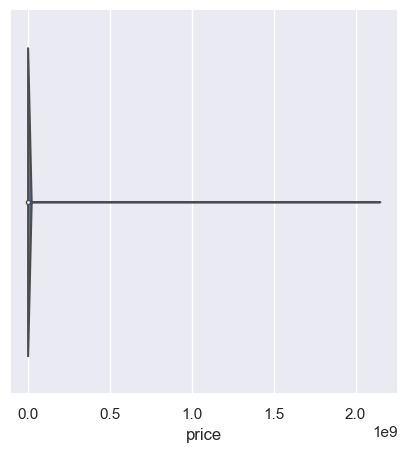

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
sns.violinplot(df['price'],orient='vertical')

## Bivariate Analysis

<AxesSubplot:xlabel='brand', ylabel='count'>

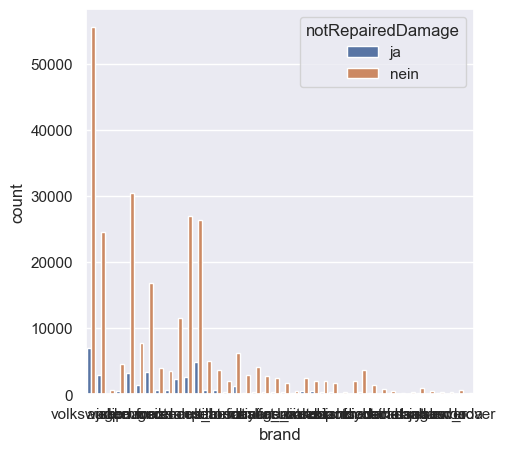

In [14]:
sns.countplot(df['brand'],hue=df['notRepairedDamage'])

<AxesSubplot:xlabel='model', ylabel='count'>

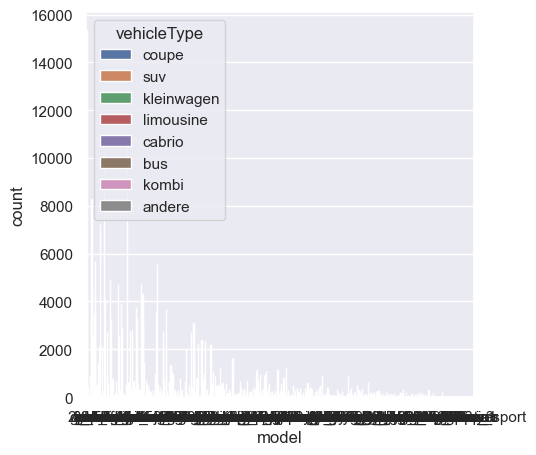

In [15]:
sns.countplot(df['model'],hue=df['vehicleType'])

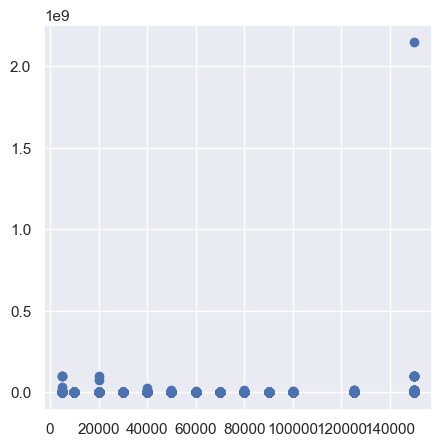

In [16]:
plt.scatter(df.kilometer,df.price)

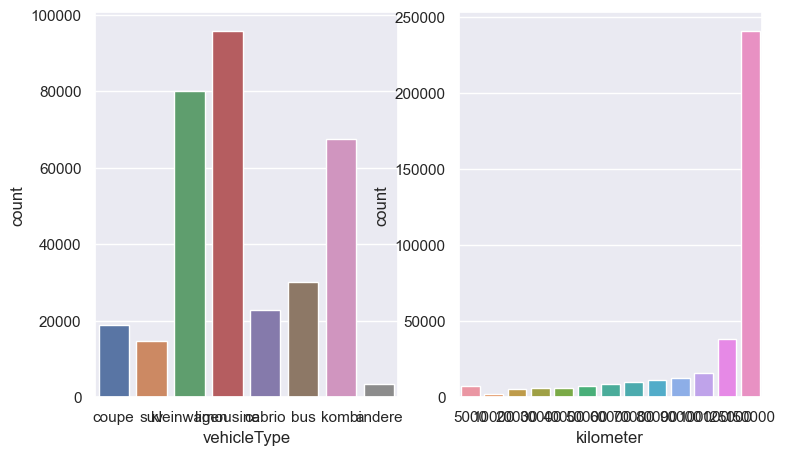

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(df['vehicleType'])
plt.subplot(1,4,2)
sns.countplot(df['kilometer'])
plt.show()

## Multivariate Analysis

<AxesSubplot:>

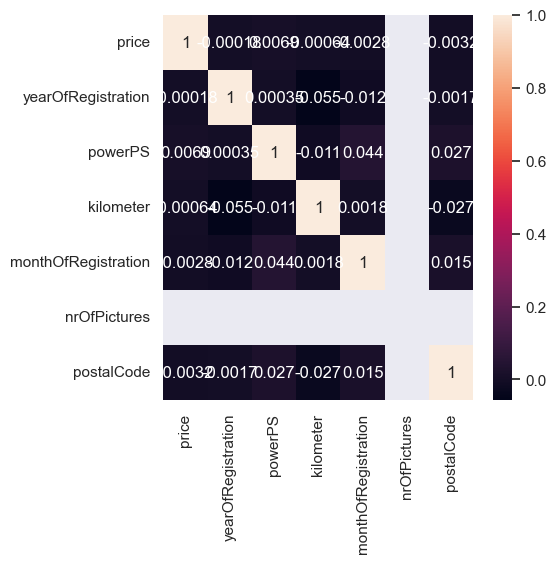

In [18]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot=True)

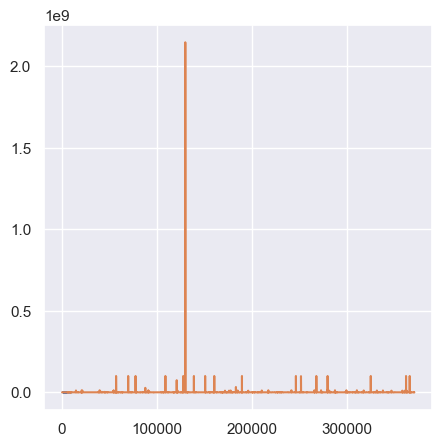

In [19]:
plt.plot(df.yearOfRegistration,df.kilometer,df.price)

<AxesSubplot:xlabel='brand', ylabel='kilometer'>

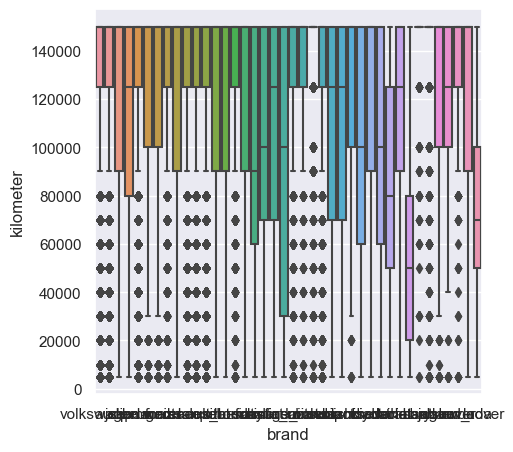

In [20]:
sns.boxplot(x = 'brand', y = 'kilometer', data = df)

<AxesSubplot:>

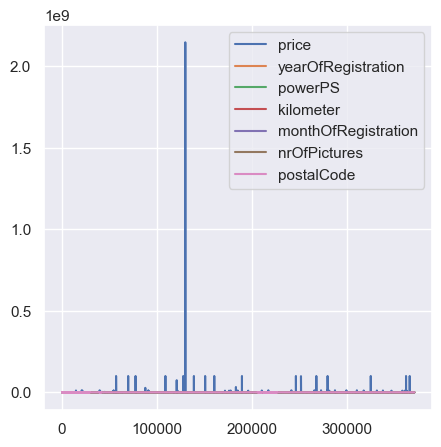

In [21]:
df.plot.line()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearOfRegistration'}>,
        <AxesSubplot:title={'center':'powerPS'}>],
       [<AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'monthOfRegistration'}>,
        <AxesSubplot:title={'center':'nrOfPictures'}>],
       [<AxesSubplot:title={'center':'postalCode'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

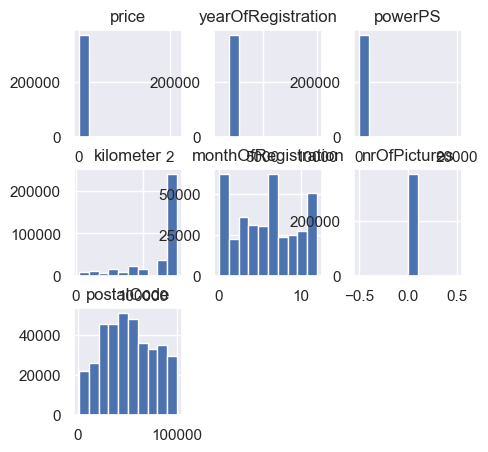

In [22]:
df.hist()